Problem Statement:
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
 Country code
 Country name
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets

In [2]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",encoding = "ISO-8859-1")    # Reading file zomato.csv)
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
dataset.shape


(9551, 21)

In [5]:
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df_code = pd.read_excel(r"/Country-Code (1).xlsx")

drive.mount

In [10]:
df_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


## Data Cleaning Process

In [11]:
data=pd.merge(dataset,df_code, on='Country Code')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [12]:
data['Country'].shape

(9551,)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [14]:
data.drop('Country Code',axis=1,inplace=True)

In [15]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [16]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

#### only Cuisines have null value and other has no null value.

In [17]:
data['Average Cost for two'].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     35,     20,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [18]:
data['Price range'].unique()

array([3, 4, 2, 1])

#### both are target and this is contuous data

In [19]:
data.describe()

,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Visualization

In [20]:
print('List of counteris the survey is spread accross - ')
for x in pd.unique(data.Country): print(x)
print()
print('Total number to country', len(pd.unique(data.Country)))

List of counteris the survey is spread accross - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total number to country 15


### understanding the rating Aggregate colur and text

In [21]:
data1 = data.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
data1
data1

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### Rating 0 - White - Not rated ,Rating 1.8 to 2.4 - Red - Poor,Rating 2.5 to 3.4 - Orange - Average, Rating 3.5 to 3.9 - Yellow - Good ,Rating 4.0 to 4.4 - Green - Very Good ,Rating 4.5 to 4.9 - Dark Green - Excellent

### Let us try to understand the spread of Average Cost for two across resturants

In [22]:
No_rating = data[data['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India seems to have maximum unrated resturants. In India the culutre of odering online food is still gaining momentum hence most of the resturants are still unrated on Zomato as people might be preferring to visit the resturanting for a meal.



In [23]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(data.Country.value_counts().index)
values = list(data.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

As Zomato is a startup from india hence it makes sense that it has maximun business spread across resturants in India



# Country and Currency

In [24]:
country_currency = data[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


# Online Delivery

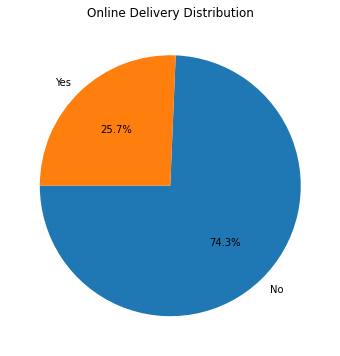

In [25]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(data['Has Online delivery'].value_counts()/9551*100, labels=data['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);

Only 25% of restuarants accepts online delivery. This data might be biased as we have maximun resturants listed here are from India.

In [26]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(12,6))
# import plotly.plotly as py

labels = list(data.City.value_counts().head(20).index)
values = list(data.City.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence Citywise",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig);

<Figure size 864x432 with 0 Axes>

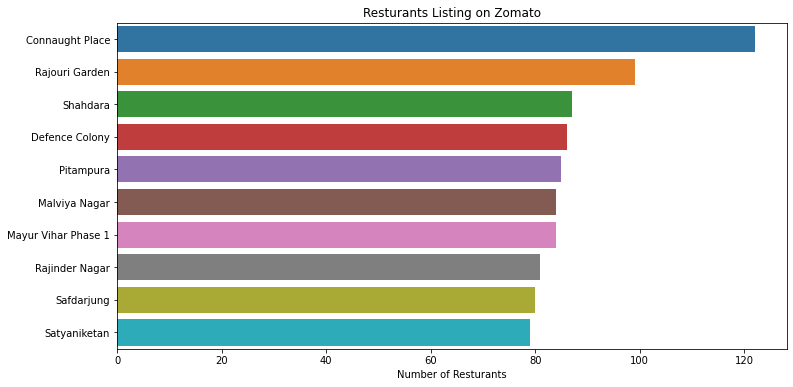

In [27]:
Delhi = data[(data.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');


In [28]:
# I achieve this by the following steps

## Fetching the resturants having 'Excellent' and 'Very Good' rating
ConnaughtPlace = Delhi[(Delhi.Locality.isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]

ConnaughtPlace = ConnaughtPlace.Cuisines.value_counts().reset_index()

## Extracing all the cuisens in a single list
cuisien = []
for x in ConnaughtPlace['index']: 
  cuisien.append(x)

# cuisien = '[%s]'%', '.join(map(str, cuisien))
cuisien

['North Indian, Chinese, Italian, Continental',
 'Continental, Italian, Asian, Indian',
 'Continental, Mediterranean, Italian, North Indian',
 'Bakery, Desserts, Fast Food',
 'North Indian, Continental',
 'North Indian, European, Asian, Mediterranean',
 'Continental, North Indian, Italian, Asian',
 'North Indian, Afghani, Mughlai',
 'North Indian, European',
 'Cafe',
 'Continental, Mexican, Burger, American, Pizza, Tex-Mex',
 'South Indian',
 'Asian, North Indian',
 'Italian, Mexican, Continental, North Indian, Finger Food',
 'Continental, American, Asian, North Indian',
 'Fast Food, American, Burger',
 'North Indian, Mediterranean, Asian, Fast Food',
 'Ice Cream',
 'Healthy Food, Continental, Italian',
 'Japanese',
 'Modern Indian',
 'Chinese',
 'Continental, North Indian, Chinese, Mediterranean',
 'North Indian, Chinese, Italian, American, Middle Eastern',
 'Biryani, Hyderabadi',
 'Biryani, North Indian, Hyderabadi',
 'North Indian, Chinese',
 'North Indian, Chinese, Continental, Ita

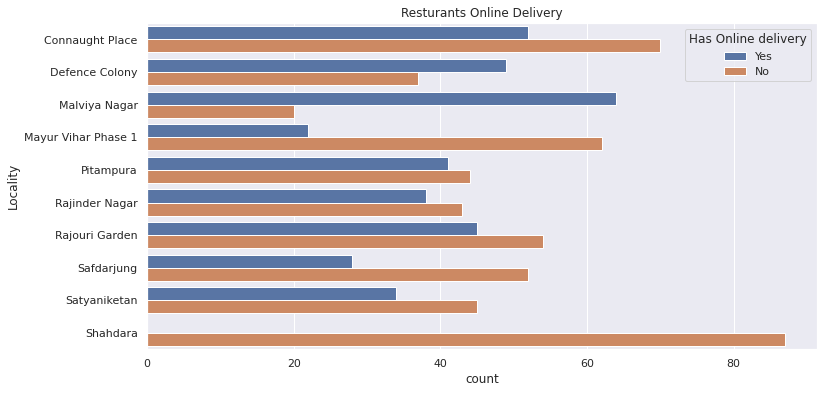

In [29]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

Apart from Shahdara locality, resturants in other locality accepts online delivery.

Online Delivery seems to be on higher side in Defence colony and Malvaiya Nagar

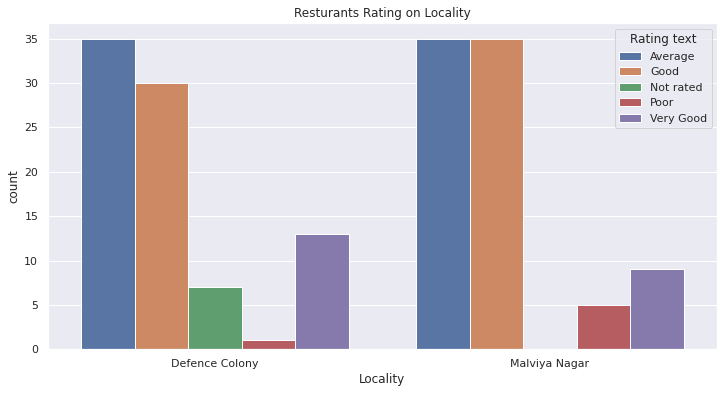

In [30]:
DefenceColony_MalviNagar = Delhi[Delhi.Locality.isin(['Defence Colony', 'Malviya Nagar'])]
plt.figure(figsize=(12,6))
ax = sns.countplot(x= "Locality", hue="Rating text", data=DefenceColony_MalviNagar)
plt.title('Resturants Rating on Locality');

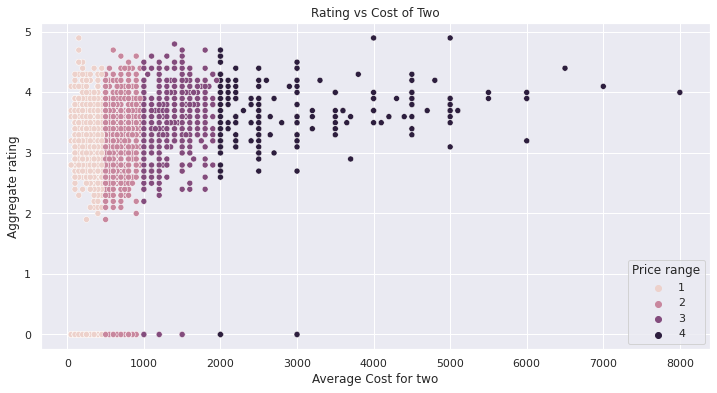

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');

In [32]:
Delhi['Rating text'].value_counts()

Average      2495
Not rated    1425
Good         1128
Very Good     300
Poor           97
Excellent      28
Name: Rating text, dtype: int64

In [33]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}

breakfast = Delhi[Delhi['Restaurant Name'].isin(types['Breakfast and Coffee'])]
american = Delhi[Delhi['Restaurant Name'].isin(types['American'])]
ice_cream = Delhi[Delhi['Restaurant Name'].isin(types['Ice Creams and Shakes'])]

In [34]:
breakfast = breakfast[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
breakfast

,Restaurant Name,Aggregate rating
2,Chaayos,3.812500
5,Starbucks,3.750000
3,Costa Coffee,3.450000
0,Barista,3.325000
4,Dunkin' Donuts,3.300000
1,Cafe Coffee Day,2.573684


In [35]:
import plotly.express as px

df1= breakfast
fig = px.bar(df1, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Breakfast and Coffee locations")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()

In [36]:
american = american[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
american

,Restaurant Name,Aggregate rating
0,Burger King,3.477778
3,McDonald's,3.445455
2,Dunkin' Donuts,3.300000
4,Pizza Hut,3.158333
5,Subway,3.047368
1,Domino's Pizza,2.794545


In [37]:
import plotly.express as px

df= american
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Fast Food Resturants")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

Burger King is rated higher that McDonald's.
Domino's seems to have got least rating.
Dunkin's donuts and Subway are rated over Domino's

In [38]:
ice_cream = ice_cream[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
ice_cream

,Restaurant Name,Aggregate rating
5,Starbucks,3.750000
2,Giani's,3.011765
3,Keventers,2.983333
0,Baskin Robbins,2.769231
1,Giani,2.675000
4,Nirula's Ice Cream,2.400000


In [39]:
import plotly.express as px

df= ice_cream
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Ice Cream Parlours")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()


## fill null values

In [40]:
data['Cuisines'].fillna("Other",inplace=True)

In [41]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Average cost of two Standard deviation is very high on Average cost for two. It is for different countries having different currency. There are 15 countries in the data set currencies are not standardized.

Max value for avarge cost of two is 800000

In [42]:
country_counts = data['Country'].value_counts()
country_counts.index[:3]

Index(['India', 'United States', 'United Kingdom'], dtype='object')

[]

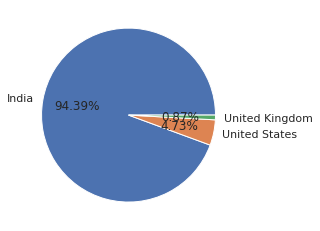

In [43]:
plt.pie(data['Country'].value_counts()[:3], labels=country_counts.index[:3],autopct='%1.2f%%')
plt.plot()

In [44]:
Indian_res = data[data['Country']=='India']

In [45]:
city_counts = Indian_res['City'].value_counts()
city_counts[:3]

New Delhi    5473
Gurgaon      1118
Noida        1080
Name: City, dtype: int64

[]

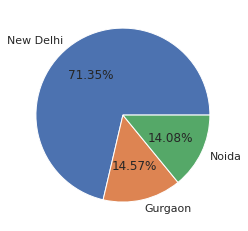

In [46]:
plt.pie(city_counts.values[:3], labels= city_counts.index[:3],autopct='%1.2f%%')
plt.plot()

In [47]:
Indian_res[Indian_res['City']=='New Delhi']['Locality'].value_counts()[:3]

Connaught Place    122
Rajouri Garden      99
Shahdara            87
Name: Locality, dtype: int64

[]

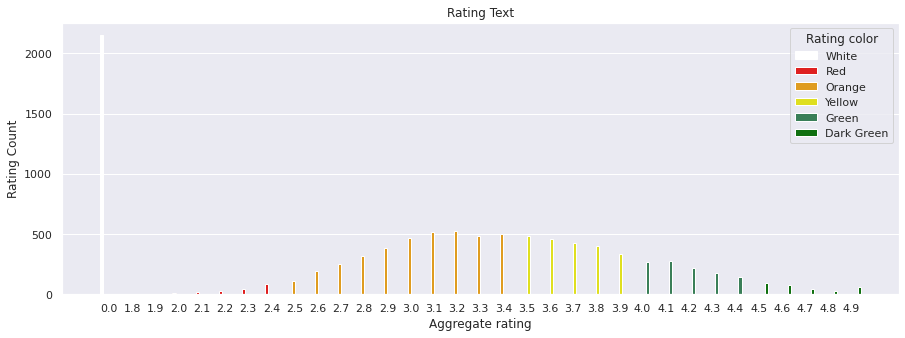

In [48]:
from numpy import median
plt.figure(figsize=(15,5))
sns.barplot(data1['Aggregate rating'],data1['Rating Count'],hue=data1['Rating color'],estimator=median,palette=['white','red','orange','yellow','seagreen','green'])
plt.title('Rating Text')
plt.plot()

[]

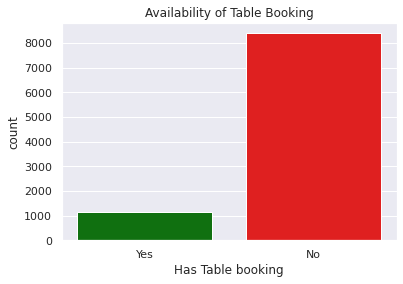

In [49]:
sns.countplot(data['Has Table booking'],palette=['green','red'])
plt.title('Availability of Table Booking')
plt.plot()

In [50]:
avg_cost_table_booking = data.groupby('Has Table booking')['Average Cost for two'].mean()
avg_cost_table_booking 

Has Table booking
No     1152.757298
Yes    1535.898100
Name: Average Cost for two, dtype: float64

# some relation with Average cost for two, target column with features

In [51]:
data.groupby('Country')['Average Cost for two'].mean().sort_values(ascending =False)

Country
Indonesia         281190.476190
Sri Lanka           2375.000000
Phillipines         1606.818182
India                623.370319
South Africa         419.733333
Qatar                223.750000
UAE                  166.416667
Singapore            155.750000
Brazil               134.666667
Turkey                84.852941
New Zealand           69.750000
United Kingdom        47.812500
Canada                36.250000
United States         26.152074
Australia             24.083333
Name: Average Cost for two, dtype: float64

In [52]:
Indian_res.groupby('City')['Average Cost for two'].mean().sort_values(ascending =False)[-3:]

City
Varanasi     505.000000
Amritsar     480.952381
Faridabad    447.609562
Name: Average Cost for two, dtype: float64

In [53]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

# Encoding the categorical data

In [54]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [55]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [56]:
data

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749.0,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,1100,...,1.0,0.0,0.0,0.0,3,4.8,0.0,1.0,314,6.0
1,6304287,3173.0,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,1200,...,1.0,0.0,0.0,0.0,3,4.5,0.0,1.0,591,6.0
2,6300002,2897.0,75.0,4684.0,308.0,314.0,121.056831,14.581404,1672.0,4000,...,1.0,0.0,0.0,0.0,4,4.4,1.0,5.0,270,6.0
3,6318506,4707.0,75.0,8690.0,862.0,875.0,121.056475,14.585318,1126.0,1500,...,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,365,6.0
4,6314302,5523.0,75.0,8689.0,862.0,875.0,121.057508,14.584450,1122.0,1500,...,1.0,0.0,0.0,0.0,4,4.8,0.0,1.0,229,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443.0,140.0,5926.0,517.0,523.0,28.977392,41.022793,1814.0,80,...,0.0,0.0,0.0,0.0,3,4.1,1.0,5.0,788,11.0
9547,5908749,1311.0,140.0,5962.0,552.0,558.0,29.041297,41.009847,1825.0,105,...,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,1034,11.0
9548,5915807,3069.0,140.0,5966.0,554.0,561.0,29.034640,41.055817,1110.0,170,...,0.0,0.0,0.0,0.0,4,3.7,5.0,2.0,661,11.0
9549,5916112,513.0,140.0,5967.0,554.0,561.0,29.036019,41.057979,1658.0,120,...,0.0,0.0,0.0,0.0,4,4.0,1.0,5.0,901,11.0


### here data cleaning and ploting part is done..




# now let's divide two target with two dataset

In [57]:
X1=data[['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country']].copy()

In [58]:
X1

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749.0,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,0.0,1.0,0.0,0.0,0.0,3,4.8,0.0,1.0,314,6.0
1,6304287,3173.0,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,0.0,1.0,0.0,0.0,0.0,3,4.5,0.0,1.0,591,6.0
2,6300002,2897.0,75.0,4684.0,308.0,314.0,121.056831,14.581404,1672.0,0.0,1.0,0.0,0.0,0.0,4,4.4,1.0,5.0,270,6.0
3,6318506,4707.0,75.0,8690.0,862.0,875.0,121.056475,14.585318,1126.0,0.0,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,365,6.0
4,6314302,5523.0,75.0,8689.0,862.0,875.0,121.057508,14.584450,1122.0,0.0,1.0,0.0,0.0,0.0,4,4.8,0.0,1.0,229,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443.0,140.0,5926.0,517.0,523.0,28.977392,41.022793,1814.0,11.0,0.0,0.0,0.0,0.0,3,4.1,1.0,5.0,788,11.0
9547,5908749,1311.0,140.0,5962.0,552.0,558.0,29.041297,41.009847,1825.0,11.0,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,1034,11.0
9548,5915807,3069.0,140.0,5966.0,554.0,561.0,29.034640,41.055817,1110.0,11.0,0.0,0.0,0.0,0.0,4,3.7,5.0,2.0,661,11.0
9549,5916112,513.0,140.0,5967.0,554.0,561.0,29.036019,41.057979,1658.0,11.0,0.0,0.0,0.0,0.0,4,4.0,1.0,5.0,901,11.0


In [59]:
Y1=data[['Average Cost for two']].copy()

In [60]:
Y1

,Average Cost for two
0,1100
1,1200
2,4000
3,1500
4,1500
...,...
9546,80
9547,105
9548,170
9549,120


## now split the data for "Price Range" Target column

In [61]:
X2=data[['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu','Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country']].copy()

In [62]:
X2

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749.0,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,1100,0.0,1.0,0.0,0.0,0.0,4.8,0.0,1.0,314,6.0
1,6304287,3173.0,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,1200,0.0,1.0,0.0,0.0,0.0,4.5,0.0,1.0,591,6.0
2,6300002,2897.0,75.0,4684.0,308.0,314.0,121.056831,14.581404,1672.0,4000,0.0,1.0,0.0,0.0,0.0,4.4,1.0,5.0,270,6.0
3,6318506,4707.0,75.0,8690.0,862.0,875.0,121.056475,14.585318,1126.0,1500,0.0,0.0,0.0,0.0,0.0,4.9,0.0,1.0,365,6.0
4,6314302,5523.0,75.0,8689.0,862.0,875.0,121.057508,14.584450,1122.0,1500,0.0,1.0,0.0,0.0,0.0,4.8,0.0,1.0,229,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443.0,140.0,5926.0,517.0,523.0,28.977392,41.022793,1814.0,80,11.0,0.0,0.0,0.0,0.0,4.1,1.0,5.0,788,11.0
9547,5908749,1311.0,140.0,5962.0,552.0,558.0,29.041297,41.009847,1825.0,105,11.0,0.0,0.0,0.0,0.0,4.2,1.0,5.0,1034,11.0
9548,5915807,3069.0,140.0,5966.0,554.0,561.0,29.034640,41.055817,1110.0,170,11.0,0.0,0.0,0.0,0.0,3.7,5.0,2.0,661,11.0
9549,5916112,513.0,140.0,5967.0,554.0,561.0,29.036019,41.057979,1658.0,120,11.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,901,11.0


In [63]:
Y2 = data[['Price range']].copy()

In [64]:
Y2

,Price range
0,3
1,3
2,4
3,4
4,4
...,...
9546,3
9547,3
9548,4
9549,4


# Correlation between target and features(for X1 and Y1)

In [65]:
data.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Locality Verbose       -0.011852
Country                -0.004034
Is delivering now      -0.001862
Restaurant ID          -0.001693
Cuisines                0.005799
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

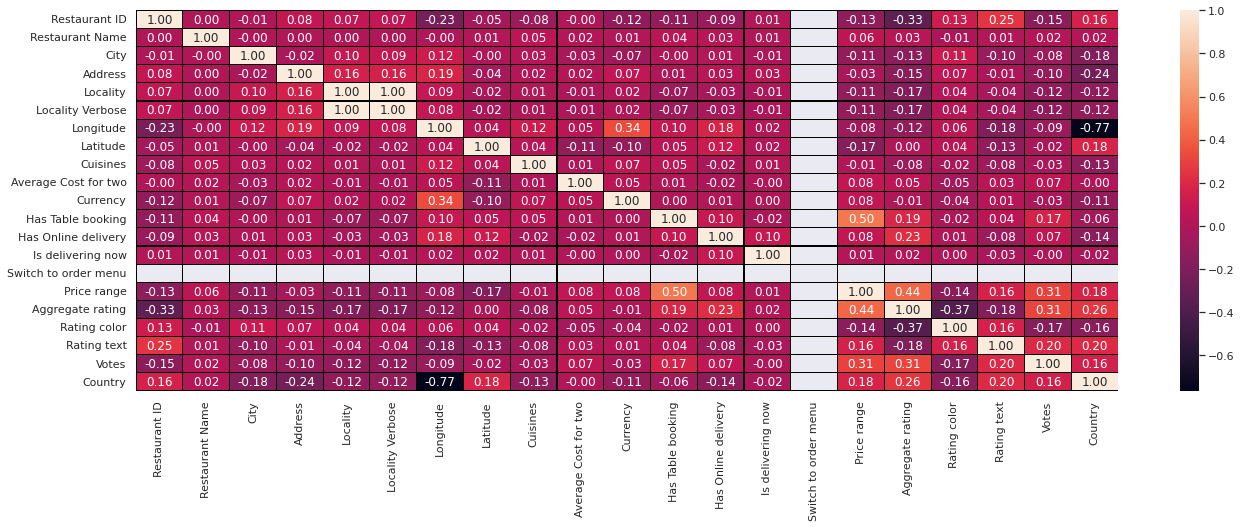

In [66]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0,.2f")


no any data is highly correlated to each other and the target.so VIF process is not needed.

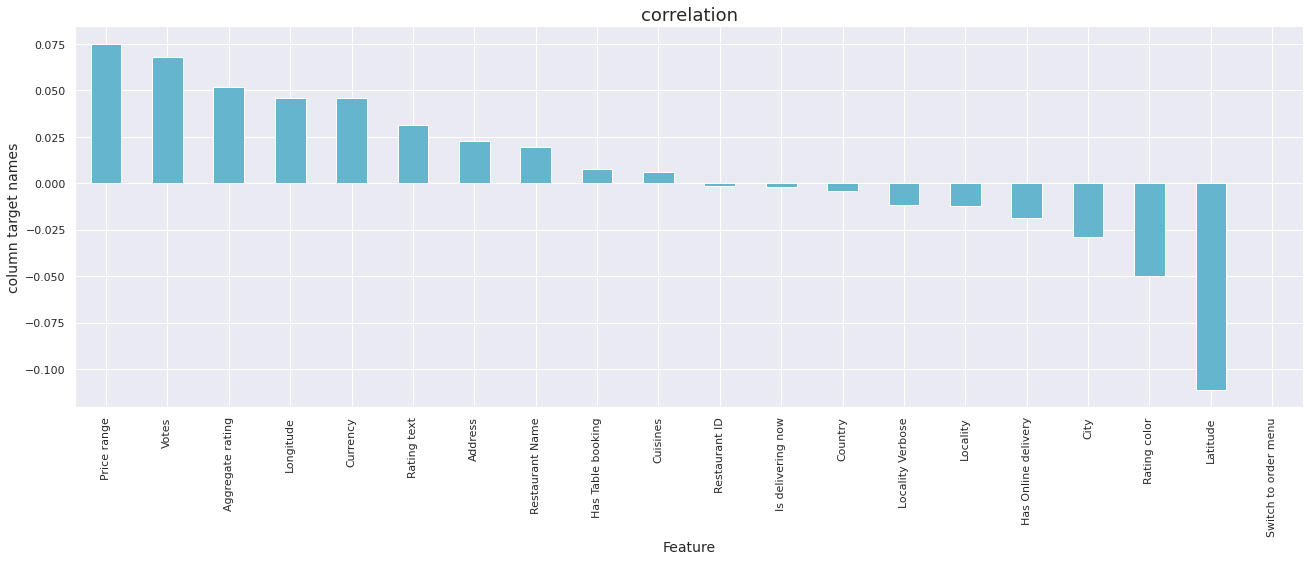

In [67]:
plt.figure(figsize=(22,7))
data.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Latitude is negative correlated but not highly

## Skewness and outliers

In [68]:
X1.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.306342
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

In [69]:
X1.describe()

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,3653.204586,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.854884,3.977699,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,8.791521e+06,2142.917876,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.585291,0.914242,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,5.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1777.500000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,6.004089e+06,3595.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.835229e+07,5485.500000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1355.000000,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,1.850065e+07,7445.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


In [70]:
X1_num = X1[['Restaurant ID', 'Longitude', 'Latitude','Price range', 'Aggregate rating','Votes']].copy()

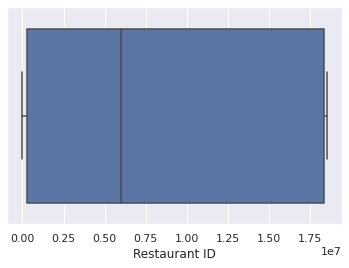

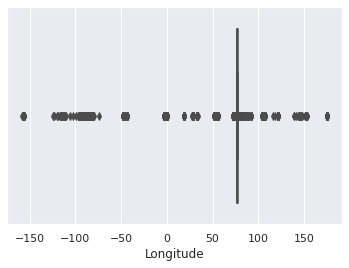

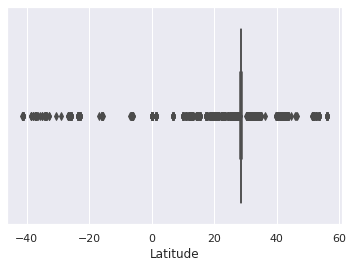

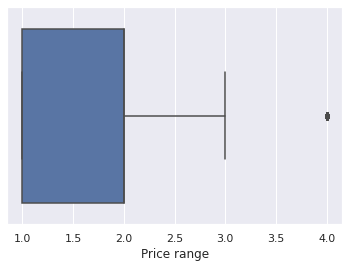

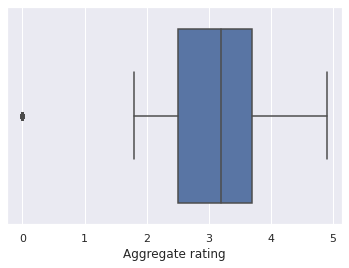

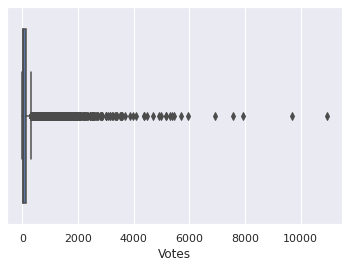

In [71]:
for i in X1_num.columns:
    sns.boxplot(X1_num[i])
    plt.show()

### Removing outliers

In [72]:
def drop_outliers(x):
    list = []
    for col in X1_num:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.75)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

X1 = drop_outliers(X1)

In [73]:
X1.shape

(6380, 20)

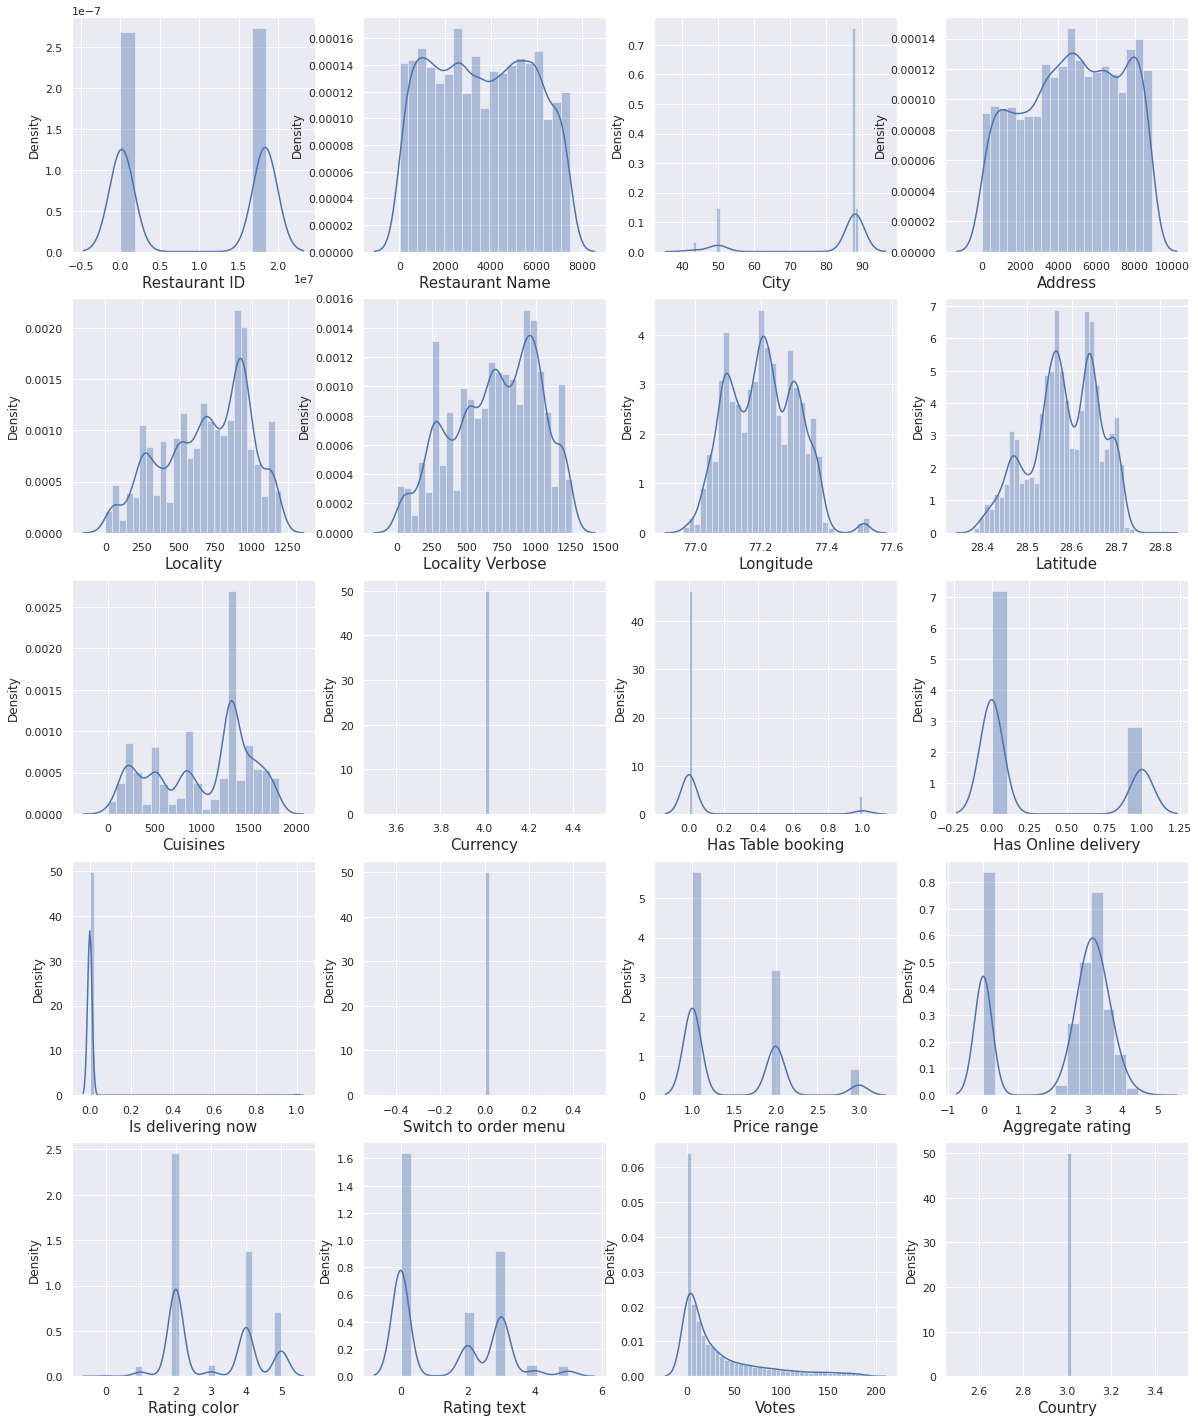

In [74]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in X1:
    if plotnum<=20:
        plt.subplot(5,4,plotnum)
        sns.distplot(X1[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

In [75]:
# data loss
(9551-6379)/9551*100

33.21118207517537

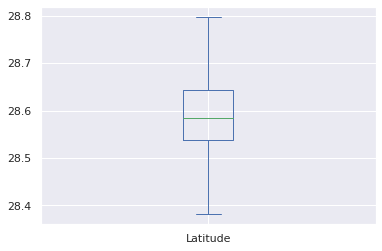

In [76]:
X1['Latitude'].plot.box()

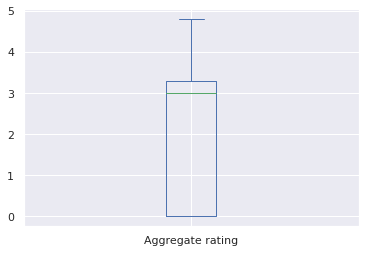

In [77]:
X1['Aggregate rating'].plot.box()

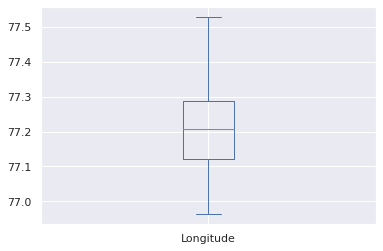

In [78]:
X1['Longitude'].plot.box()

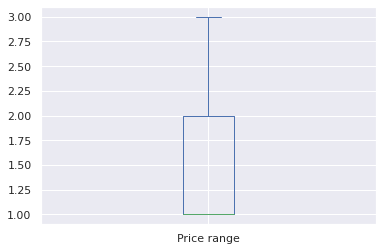

In [79]:
X1['Price range'].plot.box()

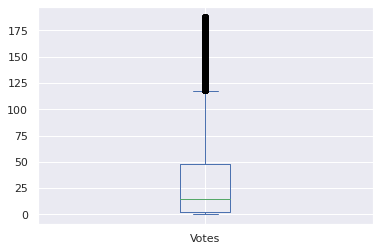

In [80]:
X1['Votes'].plot.box()

all outliers has been removed

## Feature Scaling

In [81]:
X11 = data.drop('Average Cost for two', axis=1)
Y11 = data['Average Cost for two']

In [82]:
from sklearn.preprocessing import StandardScaler
for col in X11.columns:
    scaler = StandardScaler()
    X11[col] = scaler.fit_transform(X11[col].values.reshape(-1, 1))

In [83]:
X11_train, X11_test, Y11_train, Y11_test = train_test_split(X11, Y11, test_size=0.2, random_state=21)

In [84]:
# Regression Model Function

def reg(model, X11, Y11):
    X11_train, X11_test, Y11_train, Y11_test = train_test_split(X11, Y11, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X11_train, Y11_train)
    
    # Predicting Y_test
    pred = model.predict(X11_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y11_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y11_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X11, Y11, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [85]:
# Linear Regression Model

model=LinearRegression()
reg(model, X11, Y11)

RMSE Score is: 12307.272896281309
R2 Score is: 0.07112514966224337
Cross Validation Score: -10577.393863056679
R2 Score - Cross Validation Score is 10577.46498820634


In [86]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X11, Y11)

RMSE Score is: 12317.096239938386
R2 Score is: -0.08845974703599602
Cross Validation Score: 10.278058560870843
R2 Score - Cross Validation Score is -10.366518307906839


In [87]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X11, Y11)

RMSE Score is: 12983.290904092375
R2 Score is: -11.208225870346865
Cross Validation Score: -134254.36067313037
R2 Score - Cross Validation Score is 134243.15244726


In [88]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X11, Y11)

RMSE Score is: 10016.92938733781
R2 Score is: 33.80326628667869
Cross Validation Score: -13395.211934587309
R2 Score - Cross Validation Score is 13429.015200873988


In [89]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X11, Y11)

RMSE Score is: 10022.899380528243
R2 Score is: 33.724337545119255
Cross Validation Score: -7450.177104702809
R2 Score - Cross Validation Score is 7483.901442247928


In [90]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X11, Y11)

RMSE Score is: 9038.685116020746
R2 Score is: 46.101354619185074
Cross Validation Score: -57143.778412890846
R2 Score - Cross Validation Score is 57189.87976751003


In [91]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X11, Y11)

RMSE Score is: 10413.384118444892
R2 Score is: 28.459641296262962
Cross Validation Score: -35618.86946662135
R2 Score - Cross Validation Score is 35647.32910791761


In [92]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X11, Y11)

RMSE Score is: 6722.579119954021
R2 Score is: 70.18470018303738
Cross Validation Score: -7322.355094026481
R2 Score - Cross Validation Score is 7392.539794209519


# Hyperparameter Tuning

In [93]:
# Choosing Extra Tree Regressor

fmod_param = {'n_estimators' : [40, 80, 120, 160],
              'max_features':['auto']
              ,'n_jobs':[6]}

In [94]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=4)

In [95]:
GSCV.fit(X11_train,Y11_train)

GridSearchCV(cv=4, estimator=ExtraTreesRegressor(),
             param_grid={'max_features': ['auto'],
                         'n_estimators': [40, 80, 120, 160], 'n_jobs': [6]})

In [96]:
GSCV.best_params_

{'max_features': 'auto', 'n_estimators': 80, 'n_jobs': 6}

In [97]:
Final_Model = ExtraTreesRegressor(max_features='auto', n_estimators= 80, n_jobs= 6)
Classifier = Final_Model.fit(X11_train, Y11_train)
fmod_pred = Final_Model.predict(X11_test)
fmod_r2 = r2_score(Y11_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 72.81280645399364


# Saving Best model

In [98]:
filename = "FinalModel.pkl"
joblib.dump(Final_Model, filename)

['FinalModel.pkl']

## if Zomato doing business in India then it's average price is high

## Now apply the classification problem

## here our target is Price range,it will high or low but i have data in the range form.firstly find target in categorical form

In [99]:
X2=data[['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu','Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country']].copy()

In [100]:
Y2 = data[['Price range']].copy()

In [101]:
X2

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749.0,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,1100,0.0,1.0,0.0,0.0,0.0,4.8,0.0,1.0,314,6.0
1,6304287,3173.0,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,1200,0.0,1.0,0.0,0.0,0.0,4.5,0.0,1.0,591,6.0
2,6300002,2897.0,75.0,4684.0,308.0,314.0,121.056831,14.581404,1672.0,4000,0.0,1.0,0.0,0.0,0.0,4.4,1.0,5.0,270,6.0
3,6318506,4707.0,75.0,8690.0,862.0,875.0,121.056475,14.585318,1126.0,1500,0.0,0.0,0.0,0.0,0.0,4.9,0.0,1.0,365,6.0
4,6314302,5523.0,75.0,8689.0,862.0,875.0,121.057508,14.584450,1122.0,1500,0.0,1.0,0.0,0.0,0.0,4.8,0.0,1.0,229,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443.0,140.0,5926.0,517.0,523.0,28.977392,41.022793,1814.0,80,11.0,0.0,0.0,0.0,0.0,4.1,1.0,5.0,788,11.0
9547,5908749,1311.0,140.0,5962.0,552.0,558.0,29.041297,41.009847,1825.0,105,11.0,0.0,0.0,0.0,0.0,4.2,1.0,5.0,1034,11.0
9548,5915807,3069.0,140.0,5966.0,554.0,561.0,29.034640,41.055817,1110.0,170,11.0,0.0,0.0,0.0,0.0,3.7,5.0,2.0,661,11.0
9549,5916112,513.0,140.0,5967.0,554.0,561.0,29.036019,41.057979,1658.0,120,11.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,901,11.0


In [102]:
Y2

,Price range
0,3
1,3
2,4
3,4
4,4
...,...
9546,3
9547,3
9548,4
9549,4


In [103]:
data.corr()['Price range'].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Restaurant ID          -0.134540
Locality               -0.114459
Locality Verbose       -0.112313
City                   -0.105759
Longitude              -0.078939
Address                -0.034952
Cuisines               -0.005465
Is delivering now       0.010940
Restaurant Name         0.061275
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Switch to order menu         NaN
Name: Price range, dtype: float64

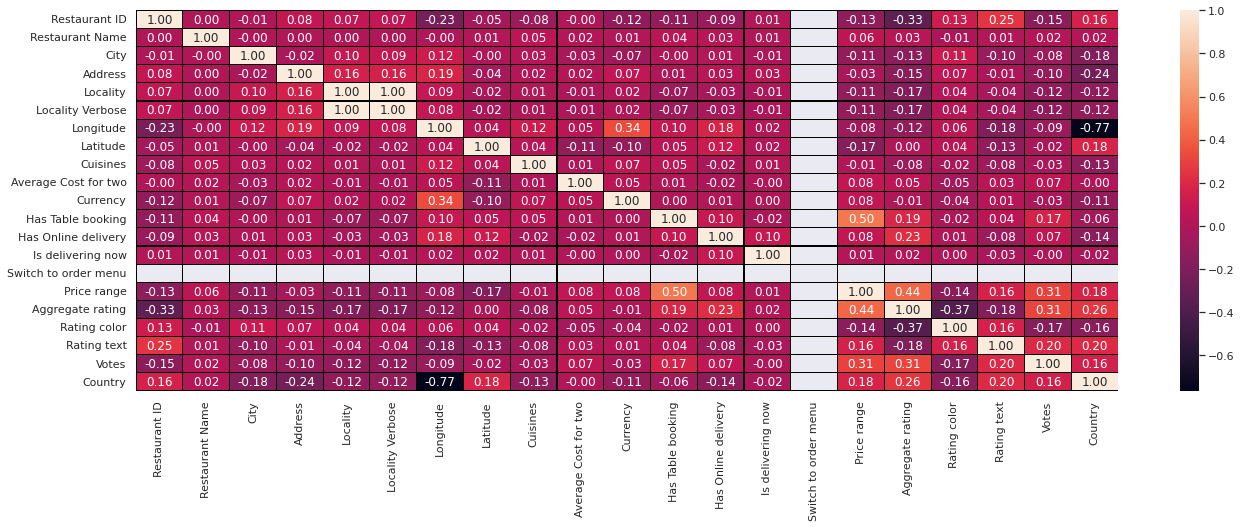

In [104]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0,.2f")


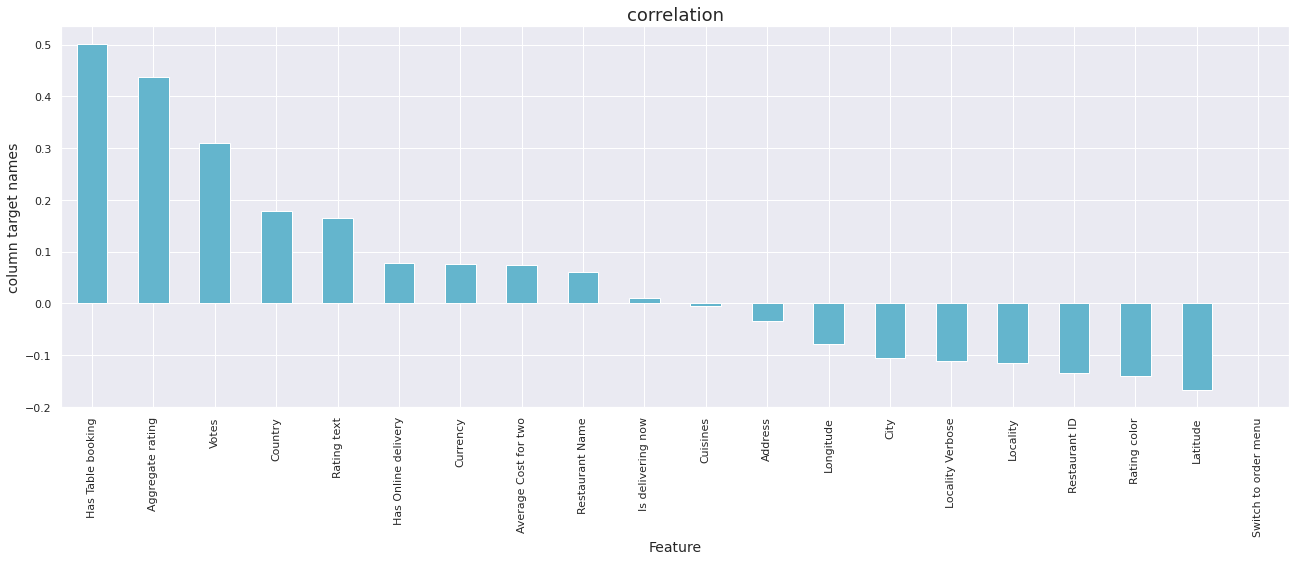

In [105]:
plt.figure(figsize=(22,7))
data.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

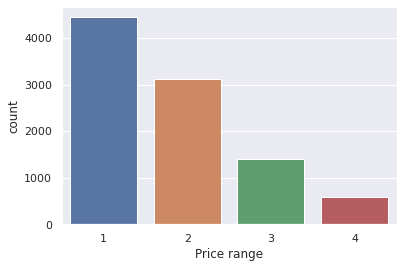

In [106]:
# Checking for class imbalance

sns.countplot(data['Price range'])

In [107]:
#  Class 1,2 carry the most of values and 3,4 carry minimum values.

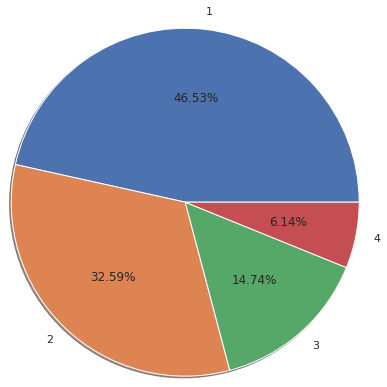

In [108]:
labels = '1','2','3','4'

fig, ax = plt.subplots()

ax.pie(data['Price range'].value_counts(),labels = labels,radius = 2, autopct = '%1.2f%%', shadow = True)

plt.show()

using above chart and graph we can understand that all values falls under 2 or below 2 those are in not good category however for those falling grater than 2 is "Good" category. Good is encoding with '1' and not good '0'

In [109]:
data['Price range'] = np.where((data['Price range'] <=2),0,1)
data['Price range'].unique()

array([1, 0])

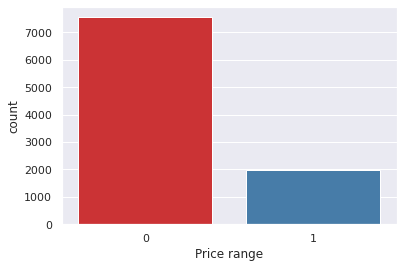

In [110]:
sns.countplot(data['Price range'], palette = "Set1")

In [111]:
data['Price range'] = data['Price range'].astype(object)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   float64
 2   City                  9551 non-null   float64
 3   Address               9551 non-null   float64
 4   Locality              9551 non-null   float64
 5   Locality Verbose      9551 non-null   float64
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9551 non-null   float64
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   float64
 11  Has Table booking     9551 non-null   float64
 12  Has Online delivery   9551 non-null   float64
 13  Is delivering now     9551 non-null   float64
 14  Switch to order menu  9551 non-null   float64
 15  Price range          

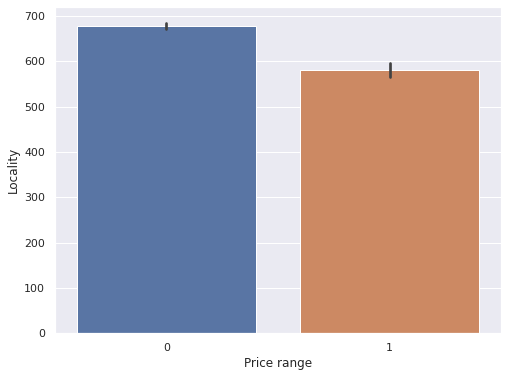

In [120]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'Price range', y = 'Locality', data = data)

In [121]:
X2=data[['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu','Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country']].copy()

In [122]:
X2.head(2)

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749.0,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,1100,0.0,1.0,0.0,0.0,0.0,4.8,0.0,1.0,314,6.0
1,6304287,3173.0,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,1200,0.0,1.0,0.0,0.0,0.0,4.5,0.0,1.0,591,6.0


In [123]:
Y2 = data[['Price range']].copy()

In [125]:
X2.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.306342
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

In [127]:
X2_num = X2[['Restaurant ID', 'Longitude', 'Latitude', 'Aggregate rating','Votes']].copy()

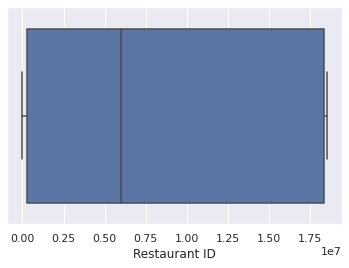

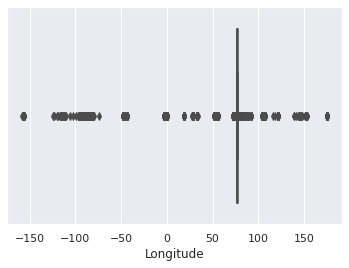

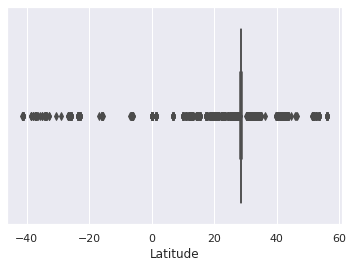

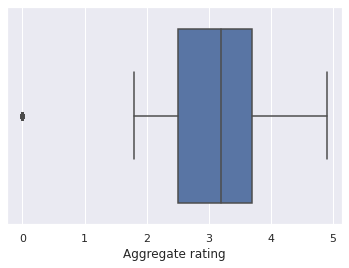

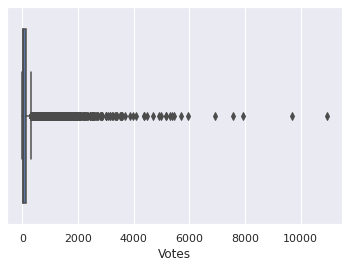

In [128]:
for i in X2_num.columns:
    sns.boxplot(X2_num[i])
    plt.show()

In [129]:
def drop_outliers(x):
    list = []
    for col in X2_num:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.75)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

X2 = drop_outliers(X2)

In [130]:
X2.shape

(5014, 20)

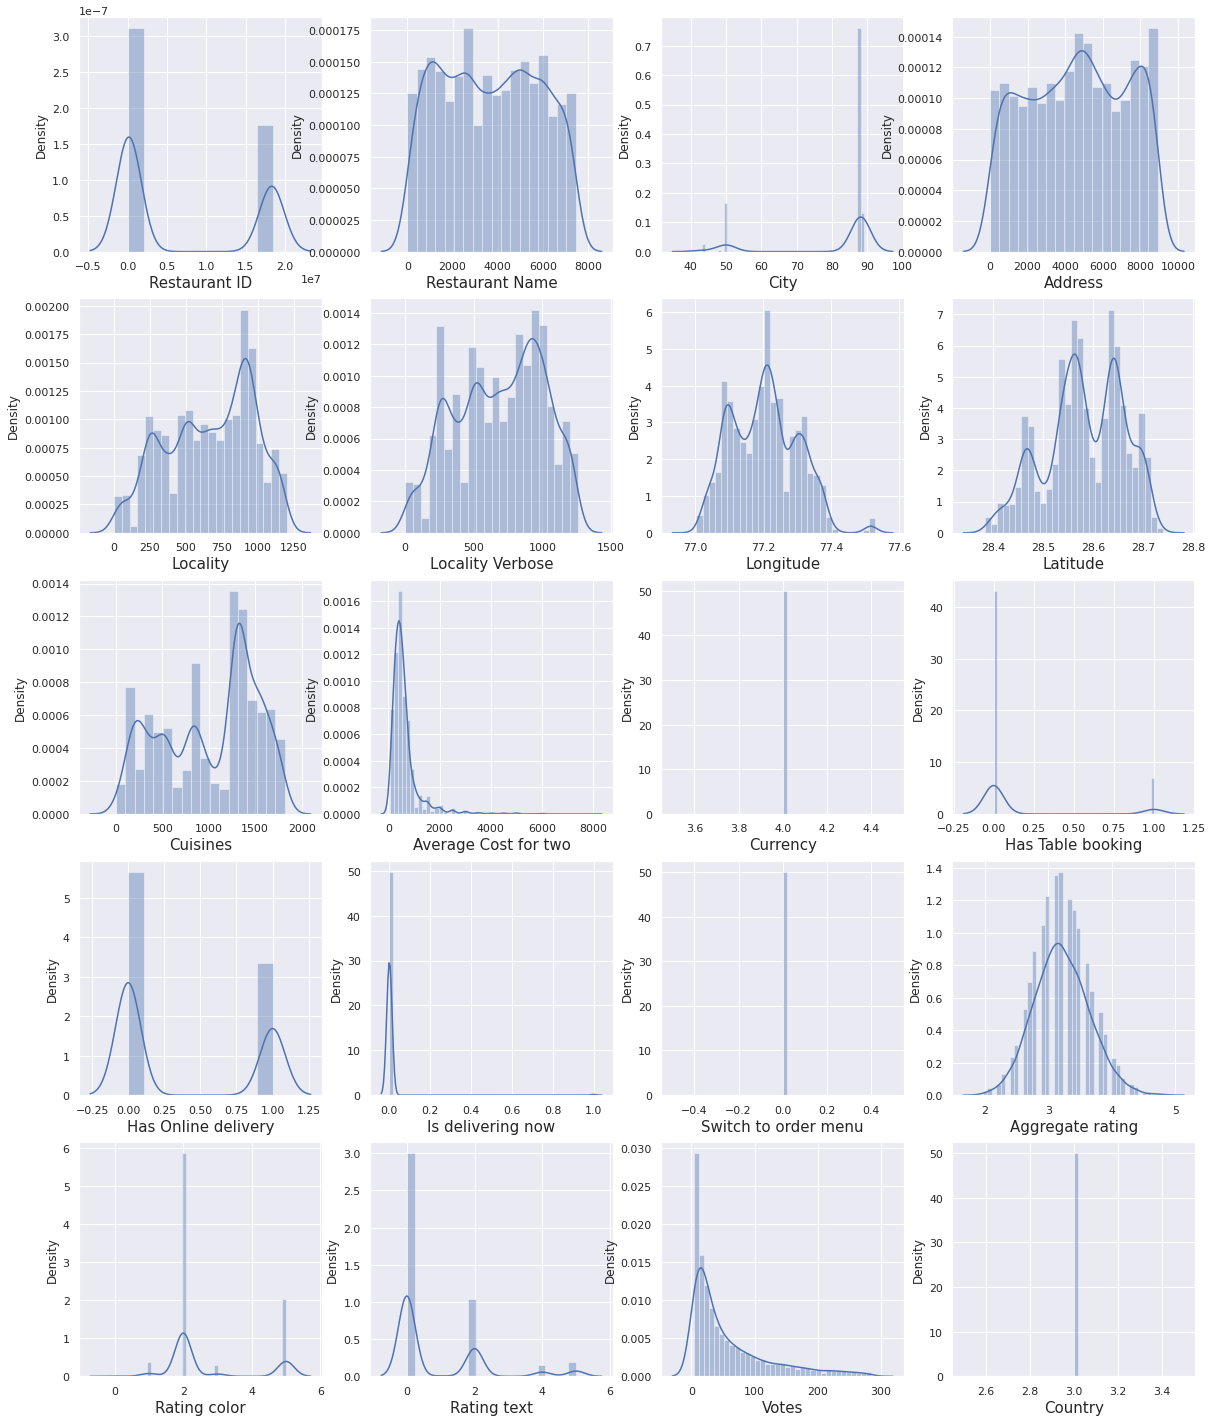

In [131]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in X2:
    if plotnum<=20:
        plt.subplot(5,4,plotnum)
        sns.distplot(X2[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

# Feature scaling

In [133]:
X = data.drop('Price range', axis=1)
Y = data['Price range']

In [134]:
from sklearn.preprocessing import StandardScaler

In [160]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

## Fixing imbalanced dataset using Oversampling

In [161]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    79.12 %
1    20.88 %
Name: Price range, dtype: object

In [162]:
from imblearn.over_sampling import RandomOverSampler 

In [163]:
ros = RandomOverSampler(random_state=42)

In [164]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [166]:
X_resample, Y_resample = ros.fit_resample(X, Y)

ValueError: ignored

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [146]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (7640, 20)
X_test shape: (1911, 20)
Y_train shape: (7640,)
Y_test shape: (1911,)


## Data modeling

In [167]:
from sklearn.feature_selection import SelectKBest, f_classif
xbest = X2.drop(columns = ['Country'])
scaled_x = sc.fit_transform(xbest)

NameError: ignored

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(X_train,Y_train)
    pred = modRF.predict(X_test)
    acc = accuracy_score(Y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

ValueError: ignored